In [1]:
import os
import sys
AbsPath = os.path.abspath("")
STEEL_Path = AbsPath+"/../.."
sys.path.append(AbsPath+"/../..")
import numpy as np
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20

plt.rcParams['font.size']=15

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
Data = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE.npy")

GalaxyMassTrack10 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks9.9.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack10[0], 0, 5).mask
GalaxyMass10 = np.log10(GalaxyMassTrack10[1][Mask])
Galaxy10SFR = np.log10(GalaxyMassTrack10[2] + GalaxyMassTrack10[3])[Mask]

GalaxyMassTrack11 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11[0], 0, 5).mask
GalaxyMass11 = np.log10(GalaxyMassTrack11[1][Mask])
Galaxy11SFR = np.log10(GalaxyMassTrack11[2] + GalaxyMassTrack11[3])[Mask]

GalaxyMassTrack11p5 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.5.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11p5[0], 0, 5).mask
GalaxyMass11p5 = np.log10(GalaxyMassTrack11p5[1][Mask])
Galaxy11p5SFR = np.log10(GalaxyMassTrack11p5[2] + GalaxyMassTrack11p5[3])[Mask]

GalaxyMassTrack12 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks12.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack12[0], 0, 5).mask
GalaxyMass12 = np.log10(GalaxyMassTrack12[1][Mask])
Galaxy12SFR = np.log10(GalaxyMassTrack12[2] + GalaxyMassTrack12[3])[Mask]


In [7]:
GalaxyMassTrack12[1]

array([2.44390453e+10, 2.47925787e+10, 2.51396668e+10, 2.54847182e+10,
       2.58291159e+10, 2.61736696e+10, 2.65189095e+10, 2.68652095e+10,
       2.72128472e+10, 2.75620365e+10, 2.79129477e+10, 2.82657198e+10,
       2.86204681e+10, 2.89772901e+10, 2.93362696e+10, 2.96974793e+10,
       3.00609830e+10, 3.04268372e+10, 3.07950923e+10, 3.11657940e+10,
       3.15389833e+10, 3.19146978e+10, 3.22929718e+10, 3.26738370e+10,
       3.30573225e+10, 3.34434557e+10, 3.38322615e+10, 3.42237638e+10,
       3.46179844e+10, 3.50149441e+10, 3.54146624e+10, 3.58171577e+10,
       3.62224472e+10, 3.66305473e+10, 3.70414736e+10, 3.74552406e+10,
       3.78718623e+10, 3.82913520e+10, 3.87137220e+10, 3.91389844e+10,
       3.95671503e+10, 3.99982306e+10, 4.04322354e+10, 4.08691744e+10,
       4.13090566e+10, 4.17518909e+10, 4.21976853e+10, 4.26464702e+10,
       4.30983198e+10, 4.35532426e+10, 4.40112468e+10, 4.44723401e+10,
       4.49365298e+10, 4.54040703e+10, 4.58750212e+10, 4.63493941e+10,
      

def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.35*z - 0.08*(z**2))
    Norm = 0.75 + 0.71*z - 0.086*(z**2)
    Alpha = 1.03 - 0.019*z + 0.007*(z**2)#
    Beta = 1.5 - 0.23*z - 0.045*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.35*z - 0.08*(z**2))
    Norm = 0.74 + 0.71*z - 0.086*(z**2)
    Alpha = 1.03 - 0.022*z + 0.0079*(z**2)#
    Beta = 1.55 - 0.225*z - 0.045*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

In [4]:
def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.34*z - 0.079*(z**2))
    Norm = 0.74 + 0.71*z - 0.087*(z**2)
    Alpha = 1.035 - 0.022*z + 0.0077*(z**2)#
    Beta = 1.55 - 0.35*z - 0.02*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

In [5]:
Data[0]

array([9.47102695e+08, 9.25062541e+08, 9.03582078e+08, ...,
       3.25758527e+10, 2.96970123e+10, 2.70161975e+10])

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


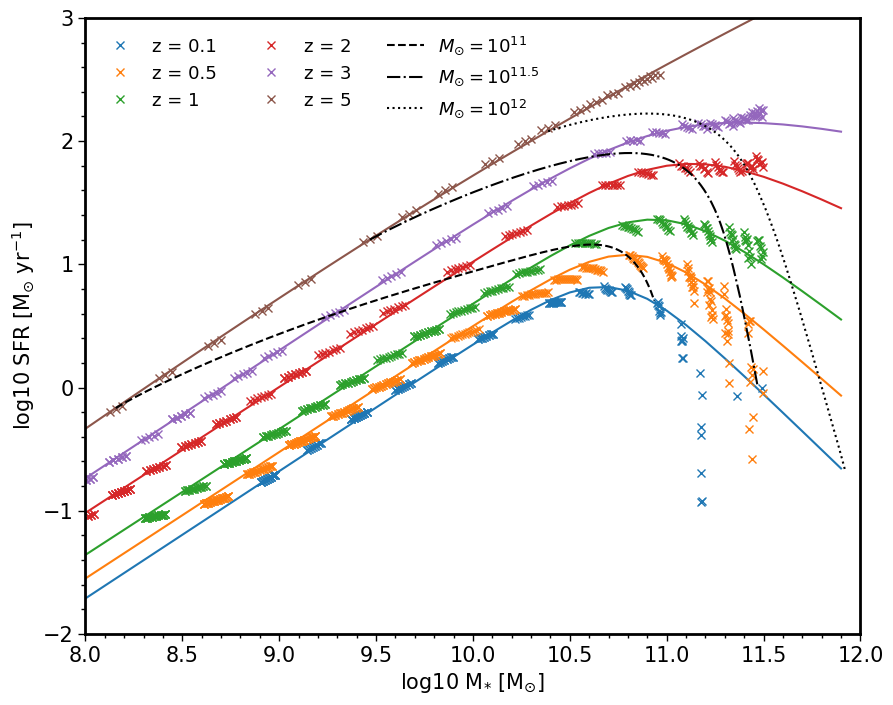

In [19]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [10,8])
for Redshift in [0.1,0.5, 1, 2, 3,5]:
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 8, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask]), "x", label = "z = {}".format(Redshift), color = colour)
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = colour)
plt.plot(GalaxyMass11, Galaxy11SFR, "--", color = "k", label = r"$M_{\odot} = 10^{11}$")
plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-.", color = "k", label = r"$M_{\odot} = 10^{11.5}$")
plt.plot(GalaxyMass12, Galaxy12SFR, ":", color = "k", label = r"$M_{\odot} = 10^{12}$")

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(8, 12)
plt.ylim(-2, 3)
plt.legend(frameon = False, ncol = 3, loc = 2, fontsize = 13)
plt.show()

In [ ]:
T = np.arange(0.1, 5, 0.1)
plt.plot(T, 0.05*np.log(1+np.divide((T*(10**3)), 1.4)))

In [ ]:
np.flip(np.cumsum(np.flip(np.arange(0.1, 1, 0.1)[:5])))

In [ ]:
np.cumsum(np.arange(1, 10, 1)[:5])